# Election data analysis for the State of Wisconsin 

In the 2016 Presidential election, the State of Wisconsin was won by the Republican nominee Donald Trump by a narrow margin of 47.2% versus 46.5% for the Demoncratic nominee Hilary Clinton. The actual difference in vote counts was 22,748. In comparison, President Obama held onto the Wisconsin by winning 52.83% in 2012	and 56.22% in 2008 respectively. In 2016, elections were also held for all 99 seats of the Wisconsin State Assembly. The Republican party held onto the majority by winning 64 seats. Since the 2010 election, the State Senate, State Assembly, and the governorship have been held by a Republican majority. This allowed the signing of a new bill by the Republican governor to give the Republican-dominant legislature the power to redistrict state boundaries before the localities finished drawing their boundaries. A new districting map was passed in 2011 and on November 21, 2016, the Federal District Court for the Western District of Wisconsin ruled that Wisconsin’s state legislative districts were unconstitutionally gerrymandered to favor Republicans. By drawing district lines which either pack Democrats into a small number of districts, or break them up across many districts, Republicans would be able to win by narrow margins in many districts.    

To study the problems of election gerrymandering and make election predictions for the upcoming mid-term election in 2018, historical election results (from 2000) for the State of Wisconsin were collected by political scientist Carl Klaner at the University of Florida (http://klarnerpolitics.com/). After cleaning the original election results, I am focusing on the visualization of election results and illustration of the correlations among different variables across several elections (from state legislature to presidential). Special thanks to Dr. Klaner who was able to obtain election data zoomed into the level of precincts, which can provide valuable information in the efforts of redrawing district lines fairly. 

The following are some preliminary analysis results.

## Inspection of state assembly election results from 2000 - 2008

The Wisconsin state assembly election results from 2000 to 2008 are plotted below. Elections in all 99 assembly districts were held every two years. Using 2000 data as the reference, the districts were ordered to show which districts had a Democratic majority. In some districts there was no Republican contender, and in others the Democratic Party had no candidate. The figure can be used to track vote % changes in every district, as a result of an incumbent retirement or new contender etc.

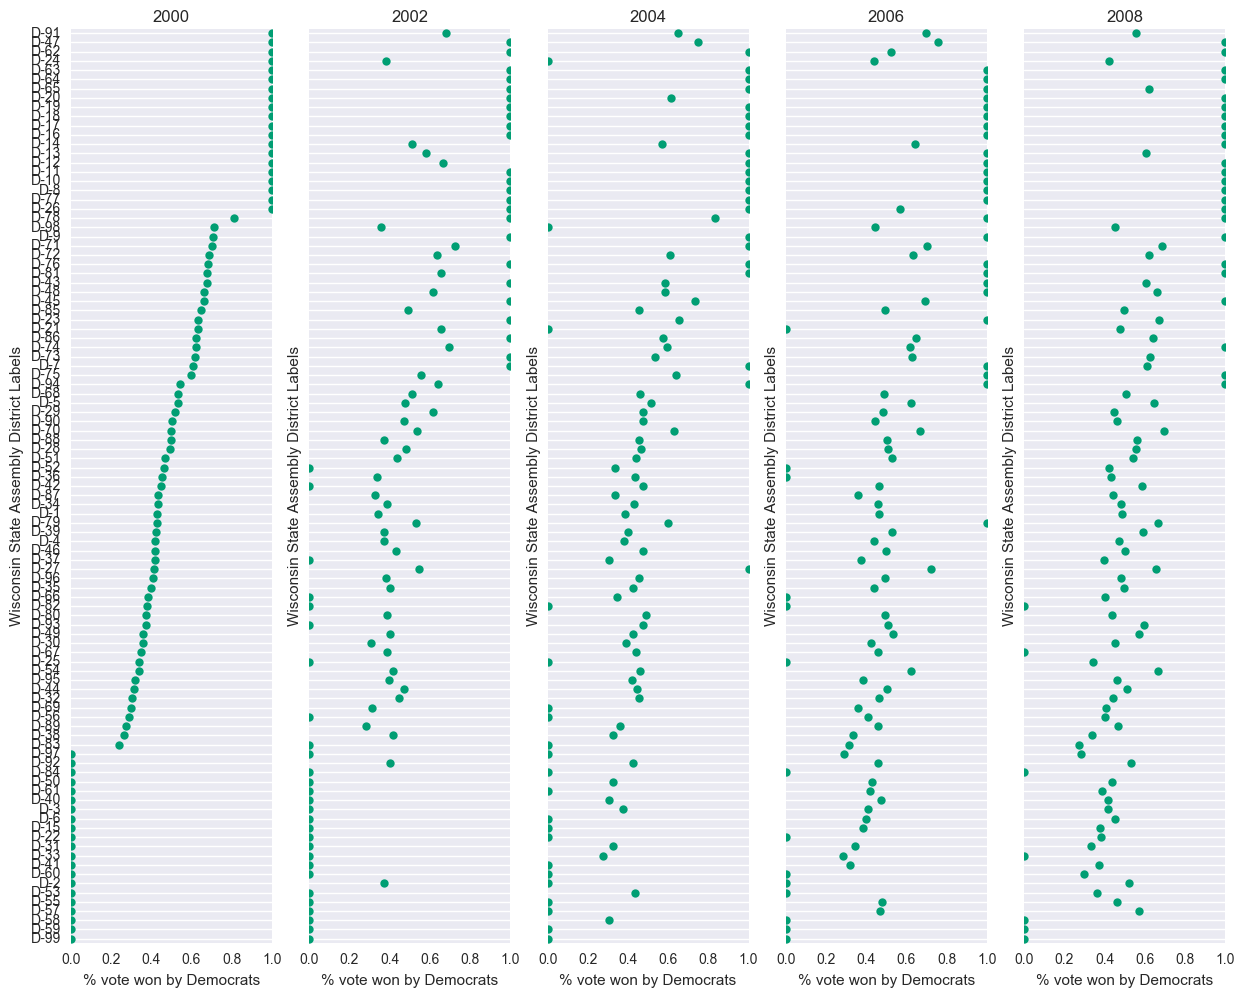

In [2]:
import pandas as pd
import seaborn as sns
    
ratio_table=pd.read_csv('table_ratio_sths00-08.csv');
    
pal = sns.color_palette("colorblind",10)
g = sns.PairGrid(ratio_table.sort_values("2000", ascending=False),
                 x_vars=ratio_table.columns[:5], y_vars=["District"], size=10, aspect=.25)
g.map(sns.stripplot, size=6, orient="h",color=pal[1], edgecolor="gray")
g.set(xlim=(0, 1), xlabel="% vote won by Democrats", ylabel="Wisconsin State Assembly District Labels")
titles = ['2000','2002','2004','2006','2008']
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
sns.plt.show()


## Seat % vs. Vote %

With detailed historical election data in each of the 99 districts, the percentage of votes won by all Democratic candidates can be calculated. Each district's representative is chosen by popular votes within their district. Ideally, the percentage of seats at the assembly should equal the Party's percentage votes from the entire state. However, it can be seen below that the Democratic Party consistently has smaller seat numbers in the assembly than its vote percentage. 

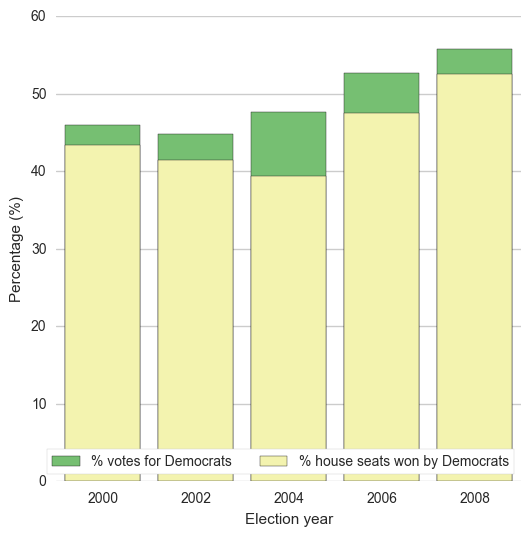

In [89]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

final_table=pd.read_csv('table_countsCompare_sths00-08.csv');
f, ax = plt.subplots(figsize=(6,6)  )  
sns.set(style="whitegrid")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="year", y="votes %", data=final_table,
            label="% votes for Democrats", color="g")

sns.set_color_codes("pastel")
sns.barplot(x="year", y="seat %", data=final_table,
            label="% house seats won by Democrats", color="y")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Election Year")
sns.despine(left=True, bottom=True)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Percentage (%)",xlabel="Election year")
sns.despine(left=True, bottom=True)
sns.plt.show()

## Efficiency gap
Noticeably in 2004, there is an $8\%$ difference in the percentage of actual votes for Democrats and the percentage of seats in the state assembly (or state house). This means that Democrats won 8 fewer seats (ie. 8% times 99 total seats) than it should have and reveals the % votes do not exactly match the % house seats. This is likely due to the efficiency gap, defined as the efficiency difference between two major parties' ability to reduce wasted votes through gerrymandering district lines.  With the "winner takes all" approach, a district winner can win by 1 or 10,000 votes. Suppose the minimum vote required to win a district is $W$. For the winning party, it has $Y_w$ votes and hence wasted $Y_w-W$ votes. For the losing party, it wasted all its votes $Y_l$ in the district since it didn't gain a seat from all its votes. 

The wasted votes for Democratic and Republican parties in each of the 99 districts are calculated and shown in the scatter plot. The data are clustered at the upper left and lower right quadrants of the scatter plot. It can be seen that there are more data points in the lower right corner, which reflects that for the Democratic party, it has more districts that have high waste counts than the Republican party, also shown by its distribution of waste votes (top histogram). The efficiency gap for Democrats in 2004 state assembly election was found to be $7\%$, which is close to the $8\%$ difference between actual votes and seat percentages mentioned above.

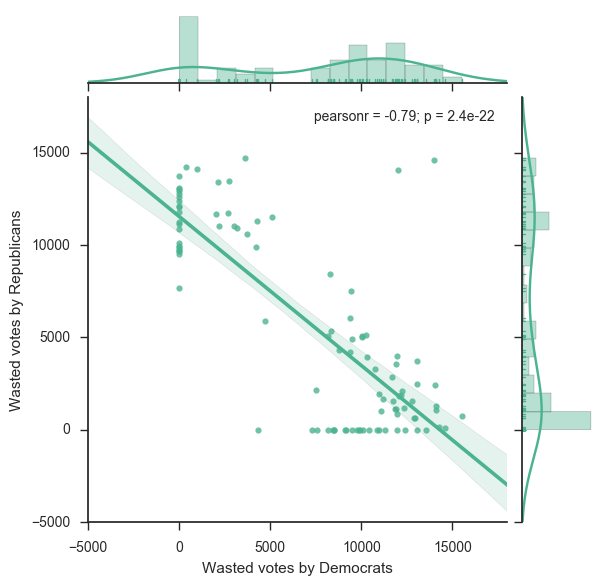

In [86]:
import seaborn as sns
import pandas as pd
waste_each_party=pd.read_csv('table_WasteEachParty_sths04.csv')        
sns.set(style="ticks")
g=sns.jointplot(x=waste_each_party.iloc[:,0], y=waste_each_party.iloc[:,1], kind="reg", color='#4CB391',marginal_kws=dict(bins=15,rug=True))
sns.plt.xlabel('Wasted votes by Democrats')
sns.plt.ylabel('Wasted votes by Republicans')

sns.plt.xlim([-5e3, 18e3])
sns.plt.ylim([-5e3, 18e3])
sns.plt.show()
#plt.scatter(waste_each_party.iloc[:,0],waste_each_party.iloc[:,0],c='r')   

It is important to note that in elections, some districts have uncontested candidates. In the above analysis, uncontested districts were included in the efficiency gap calculations. Republicans have argued that the efficiency gap is not as big as the Democrats claim because votes in uncontested districts should not be counted toward the total votes given the opposite party has no candidate. However, as the following plots show, including ONLY contested districts increases the efficiency gap.

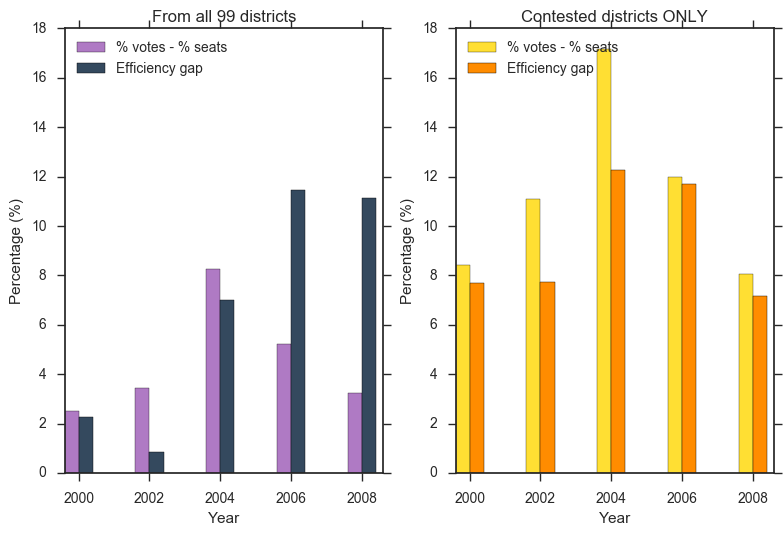

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

table_orig=pd.read_csv("table_vote_diff_effgap_diff_AllDistricts_sths00-08.csv")
table_ContestedOnly=pd.read_csv("table_vote_diff_effgap_diff_contestedOnly_sths00-08.csv")

index = np.arange(5)
bar_width = 0.2
opacity = 0.8

#f, axarr = plt.subplots(1,2)
f = plt.figure()
axarr = []
axarr.append(f.add_subplot(1,2,1))

axarr[0].bar(index, table_orig['diff. in votes'], bar_width,alpha=opacity,color='#9b59b6', label='% votes - % seats')
axarr[0].bar(index + bar_width, table_orig['eff. gap'], bar_width,color='#34495e',label='Efficiency gap')
axarr[0].set_xlabel('Year')
axarr[0].set_ylabel('Percentage (%)')
axarr[0].legend(loc=2)
axarr[0].set_title('From all 99 districts')
axarr[0].set_ylim([0, 18])
plt.xticks(index + bar_width, ('2000','2002','2004','2006','2008'))

axarr.append(f.add_subplot(1,2,2))
axarr[1].bar(index, table_ContestedOnly['diff. in votes'], bar_width, alpha=opacity, color='gold',label='% votes - % seats')
axarr[1].bar(index + bar_width, table_ContestedOnly['eff. gap'], bar_width,color='darkorange',label='Efficiency gap')
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Percentage (%)')
axarr[1].legend(loc=2)
axarr[1].set_title('Contested districts ONLY')
axarr[1].set_ylim([0, 18])
plt.xticks(index + bar_width, ('2000','2002','2004','2006','2008'))
#plt.xticks(index + bar_width, ('2000','2002','2004','2006','2008'))

plt.tight_layout()
plt.show()

## Wisconsin State Assembly Election vs. Presidential election 

Members of the Wisconsin State Assembly are elected every two years without term limits. With 99 district members, the Wisconsin State Assembly, like the US Congress, is the legislative branch of the state government that prepares and passes state laws. Studies have shown that the State Assembly election results are correlated with the Presidential elections. The favorability of a State Assembly candidate can depend on his or her party affiliation with the President. 

The State Assembly election and Presidential election results from 2000, 2004, 2008 were analyzed to illustrate the relationships. Note that, district results with uncontested Democratic or Republican candidates were removed. It can be seen that there is clear correlation between the two elections (in terms of corresponding % votes). 

For mid-term State Assembly elections (ie. two years after a Presidential Election), the correlation between State Assembly election and the sitting President can be used to predict the winning probability of a State Assembly election canadiate. 


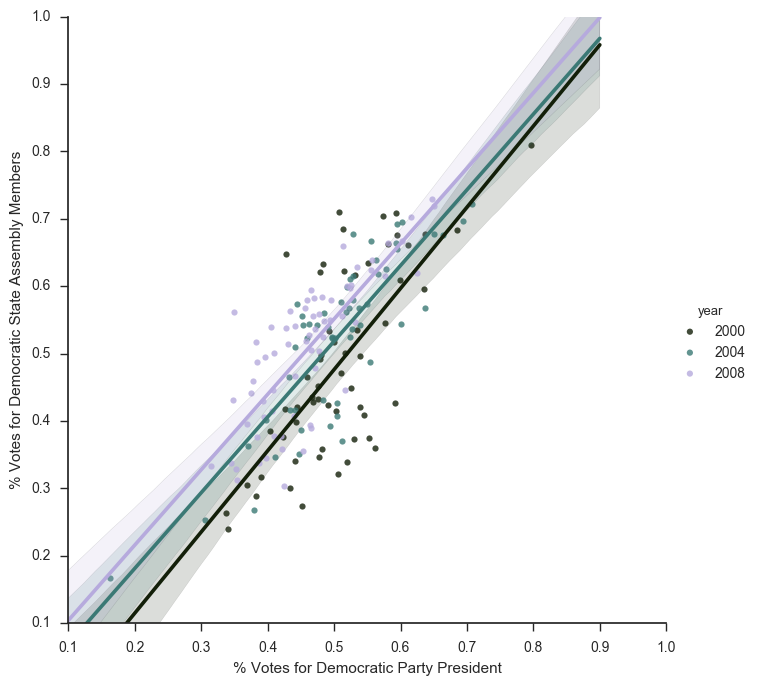

In [84]:
correl_table_all_years=pd.read_csv('table_correl_contestedOnly_sths00-08_prez00-08.csv')
pal = sns.cubehelix_palette(4, 1.5, .75, light=.1, dark=1)

   # Plot tip as a function of toal bill across days
g = sns.lmplot(x="prez", y="sths", hue="year", data=correl_table_all_years, palette=pal, size=7)

# Use more informative axis labels than are provided by default
g.set_axis_labels("% Votes for Democratic Party President", "% Votes for Democratic State Assembly Members")

sns.plt.xlim([0.1,1.0])
sns.plt.ylim([0.1,1.0])
sns.plt.show()

# Conclusion
The goals of this on-going analysis of historic elections in the state of Wisconsin are to collect quantitative evidence of gerrymandering and to propose strategies for drawing fair district maps for state legislature elections. We saw the 99 districts of the Wisconsin state assembly elections had a majority of Republican Party. It is found that the number of seats in the state assembly held by Democratic members did not in fact reflect its actual percentage of votes. The calculation of the efficiency gap reveals that Democratic Party consistently lost assmebly seats possibly due to gerrymandering of district maps. Both Democratic Party and Republican Parties have districts in which there was uncontested elections. The level of efficiency gap is magnified when considering only districts which had both Democratic and Republican candidates. For those districts without a Democratic candidate, a prediction of the percentage vote for a Democratic contender could be made using presidential election results. The correlation between state assembly election and the presidential election is well-known and demonstrated here. Approval rating of the president and other factors such as the candidate's incumbency status can affect the state election prediction. This study will continue to examine these factors using historic data (2000 - 2016) for state senate, state attorney, US congressional and senate member elections, and to make election predictions for the upcoming 2018 mid-term elections in the state of Wisconsin.
